<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/Neural_Network_Rectified_Linear_Unit_(ReLU)_vs_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Neural Network Rectified Linear Unit (ReLU) vs Sigmoid</h1>



<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Network, Criterion function, Optimizer.</h5>
<h5> 2. Test Sigmoid and Relu. </h5>
<h5> 3. Analyze Results. </h5>     


<h2>Table of Contents</h2>
<p>In this lab, you will test Sigmoid and Relu activation functions on the MNIST dataset with two hidden Layers.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid and Relu </a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


We'll need the following libraries


In [ ]:
!pip3 install torch torchvision torchaudio

In [73]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform tensors
import torchvision.transforms as transforms
# Allows us to download datasets
import torchvision.datasets as dsets
# Allows us to use activation functions
import torch.nn.functional as F
# Used to graph data and loss curves
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset

# Setting the seed will allow us to control randomness and give us reproducibility
torch.manual_seed(2)

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2>


Define the neural network module or class, with two hidden Layers


<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model">


In [ ]:
# Create the model class using Sigmoid as the activation function

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self,x):
        # Puts x through the first layers then the sigmoid function
        x = torch.sigmoid(self.linear1(x))
        # Puts results of previous line through second layer then sigmoid function
        x = torch.sigmoid(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define the class for the Relu activation function


In [ ]:
# Create the model class using Relu as the activation function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self, x):
        # Puts x through the first layers then the relu function
        x = torch.relu(self.linear1(x))
        # Puts results of previous line through second layer then relu function
        x = torch.relu(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define a function to  train the model, in this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data


In [ ]:
# Model Training Function

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    # Number of times we train on the entire training dataset
    for epoch in range(epochs):
        # For each batch in the train loader
        for i, (x, y) in enumerate(train_loader):
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction on the image tensor by flattening it to a 1 by 28*28 tensor
            z = model(x.view(-1, 28 * 28))
            # Calculate the loss between the prediction and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Saves the loss
            useful_stuff['training_loss'].append(loss.data.item())

        # Counter to keep track of correct predictions
        correct = 0
        # For each batch in the validation dataset
        for x, y in validation_loader:
            # Make a prediction
            z = model(x.view(-1, 28 * 28))
            # Get the class that has the maximum value
            _, label = torch.max(z, 1)
            # Check if our prediction matches the actual class
            correct += (label == y).sum().item()

        # Saves the percent accuracy
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [ ]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 140458958.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 31293126.80it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 22837084.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 791233.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [ ]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  


In [ ]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object


In [ ]:
# Create the training data loader and validation data loader object

# Batch size is 2000 and shuffle=True means the data will be shuffled at every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# Batch size is 5000 and the data will not be shuffled at every epoch
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


Take only some data

In [ ]:
from torch.utils.data import Subset, DataLoader

In [ ]:
num_samples = 5000

# Training
subset_indices = torch.arange(num_samples)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(dataset=train_subset, batch_size=100, shuffle=True)

# Validation
num_validation_samples = 1000
validation_subset_indices = torch.arange(num_validation_samples)
validation_subset = Subset(validation_dataset, validation_subset_indices)
validation_loader = DataLoader(dataset=validation_subset, batch_size=100, shuffle=True)

<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2>


Create  the model with 100 hidden neurons  


In [ ]:
# Set the parameters to create the model
input_dim = 28 * 28 # Dimensión de una imagen
hidden_dim1 = 20
hidden_dim2 = 20
output_dim = 10 # Número de clases
cust_epochs = 5
batch_size = 128
learning_rate = 0.01

The epoch number in the video is 35. You can try 10 for now. If you try 35, it may take a long time.


In [ ]:
# Set the number of iterations

#cust_epochs = 10

<!--Empty Space for separating topics-->


<h2 id="Test">Test Sigmoid and Relu</h2>


Train the network using the Sigmoid activation function


In [ ]:
# Train the model with sigmoid function

#learning_rate = 0.01
# Create an instance of the Net model
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Train the network using the Relu activation function


In [ ]:
# Train the model with relu function

learning_rate = 0.01
# Create an instance of the NetRelu model
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
# Train the model
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2>


Compare the training loss for each activation


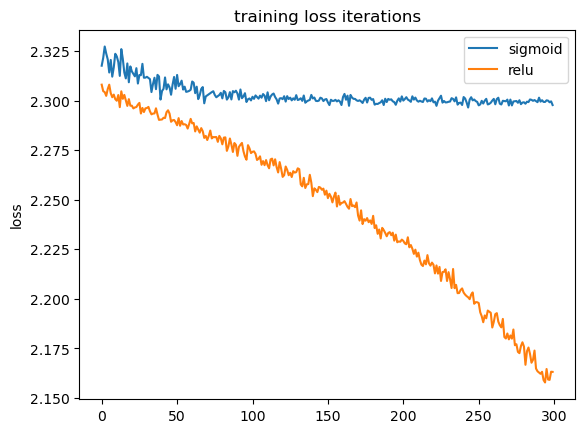

In [ ]:
# Compare the training loss

plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

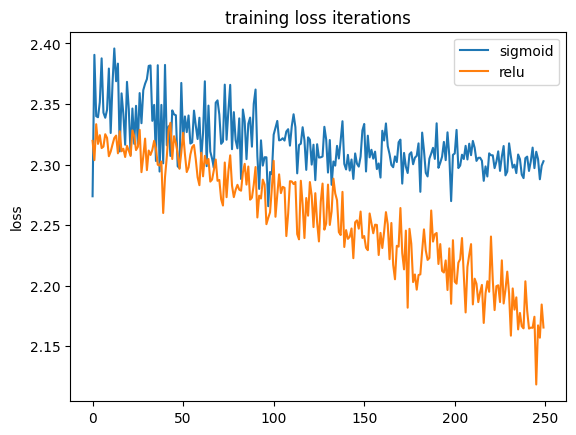

In [ ]:
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  


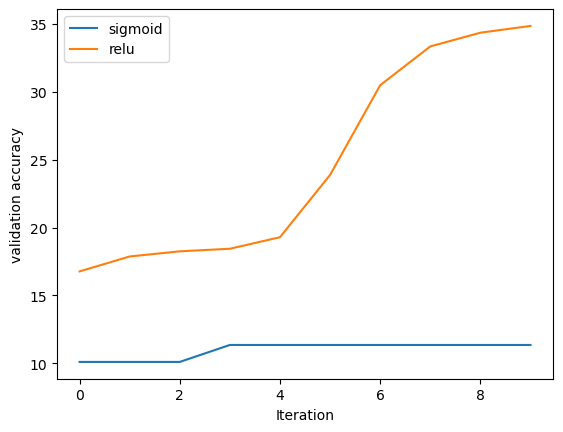

In [ ]:
# Compare the validation loss

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()

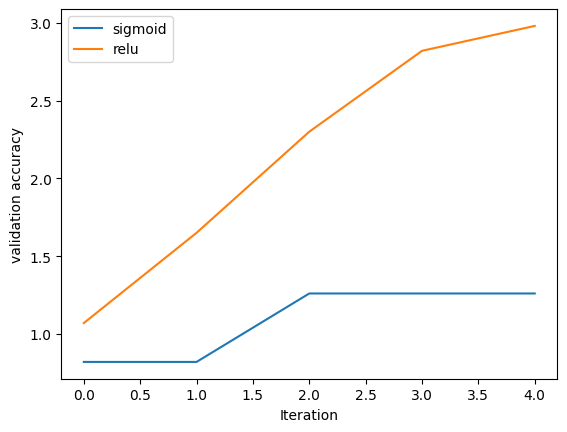

In [ ]:
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()

# Revisar la cantidad de datos y los parámetros de la NN para intentar mejorar la validation accuracy sobre todo, que en esta segunda gráfica sale mucho más baja que en el entrnamiento original.

## Convolution NNs

In [ ]:
# Define the function for plotting the channels

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0

    #plot outputs as rows inputs as columns
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()

In [ ]:
# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)
    plt.show()

In [ ]:
# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.9)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
IMAGE_SIZE = 16

# First the image is resized then converted to a tensor
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

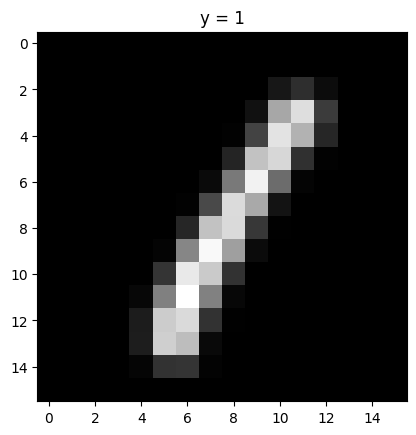

In [ ]:
show_data(train_dataset[3])

In [ ]:
class CNN(nn.Module):

    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        # The reason we start with 1 channel is because we have a single black and white image
        # Channel Width after this layer is 16
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        # Channel Wifth after this layer is 8
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        # Channel Width after this layer is 8
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        # Channel Width after this layer is 4
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        # In total we have out_2 (32) channels which are each 4 * 4 in size based on the width calculation above. Channels are squares.
        # The output is a value for each class
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)

    # Prediction
    def forward(self, x):
        # Puts the X value through each cnn, relu, and pooling layer and it is flattened for input into the fully connected layer
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

    # Outputs result of each stage of the CNN, relu, and pooling layers
    def activations(self, x):
        # Outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)

        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [ ]:
model = CNN(out_1=16, out_2=32)

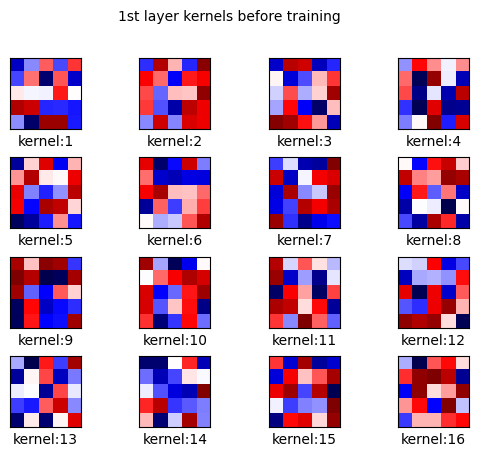

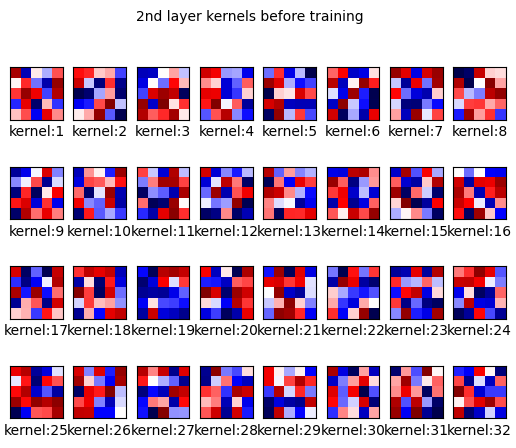

In [ ]:

plot_parameters(model.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
plot_parameters(model.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

In [ ]:
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# Create a Data Loader for the training data with a batch size of 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
# Create a Data Loader for the validation data with a batch size of 5000
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [ ]:
# Set the parameters to create the model
input_dim = 28 * 28 # Dimensión de una imagen
hidden_dim1 = 20
hidden_dim2 = 20
output_dim = 10 # Número de clases
cust_epochs = 5
batch_size = 128
#learning_rate = 0.01

In [ ]:
num_samples = 10000

# Training
subset_indices = torch.arange(num_samples)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(dataset=train_subset, batch_size=100, shuffle=True)

# Validation
num_validation_samples = 1000
validation_subset_indices = torch.arange(num_validation_samples)
validation_subset = Subset(validation_dataset, validation_subset_indices)
validation_loader = DataLoader(dataset=validation_subset, batch_size=100, shuffle=True)

In [ ]:
# Train the model

# Number of times we want to train on the taining dataset
n_epochs=3
# List to keep track of cost and accuracy
cost_list=[]
accuracy_list=[]
# Size of the validation dataset
N_test=len(validation_dataset)

# Model Training Function
def train_model(n_epochs):
    # Loops for each epoch
    for epoch in range(n_epochs):
        # Keeps track of cost for each epoch
        COST=0
        # For each batch in train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            z = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Cumulates loss
            COST+=loss.data

        # Saves cost of training data of epoch
        cost_list.append(COST)
        # Keeps track of correct predictions
        correct=0
        # Perform a prediction on the validation  data
        for x_test, y_test in validation_loader:
            # Makes a prediction
            z = model(x_test)
            # The class with the max value is the one we are predicting
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual value
            correct += (yhat == y_test).sum().item()

        # Calcualtes accuracy and saves it
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

train_model(n_epochs)

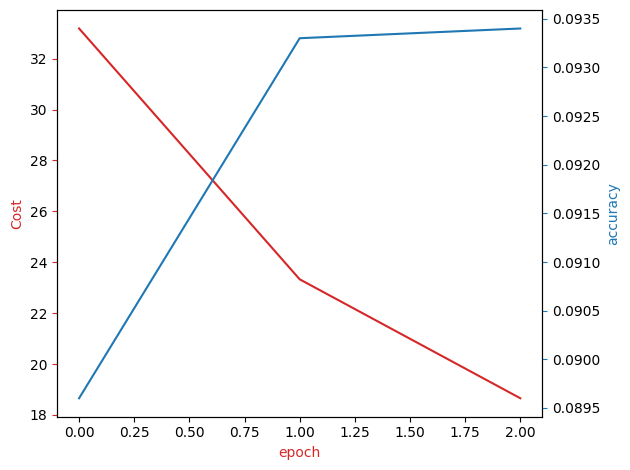

In [ ]:
# Plot the Loss and Accuracy vs Epoch graph

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

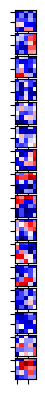

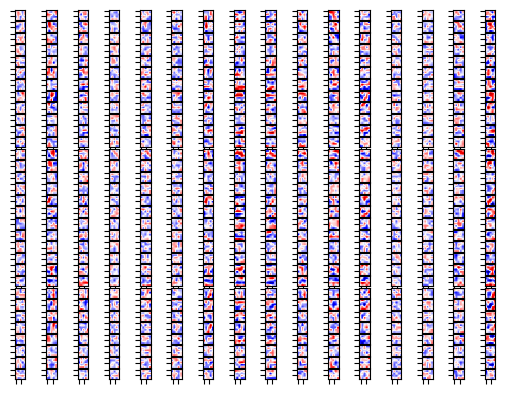

In [ ]:
plot_channels(model.state_dict()['cnn1.weight'])
plot_channels(model.state_dict()['cnn2.weight'])

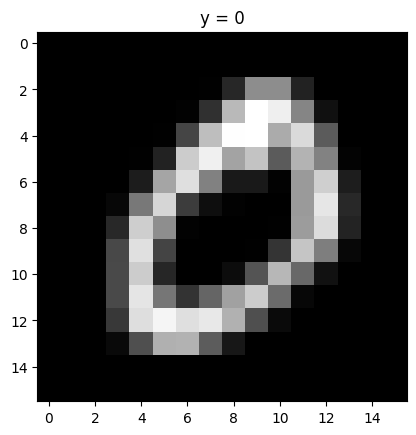

In [ ]:
show_data(train_dataset[1])

In [ ]:
out = model.activations(train_dataset[1][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

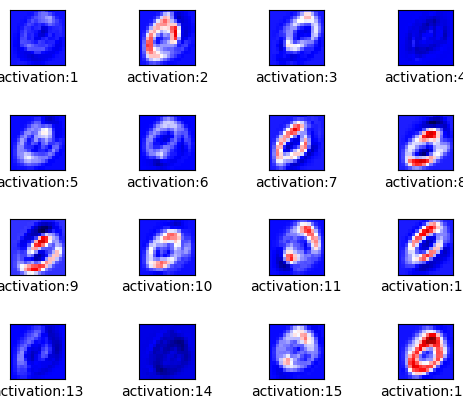

In [ ]:
plot_activations(out[0], number_rows=4, name="Output after the 1st Relu")

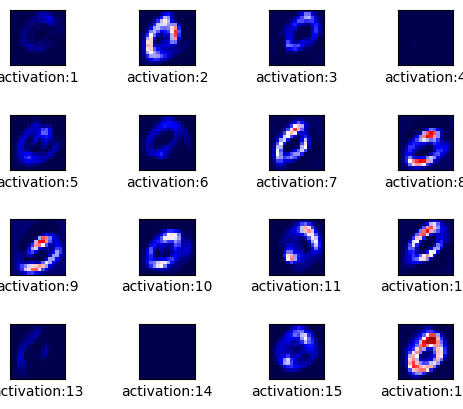

In [ ]:
# Plot the outputs after the second Relu

plot_activations(out[1], number_rows=4, name="Output after the 2nd Relu")

We can  see the result for the third sample


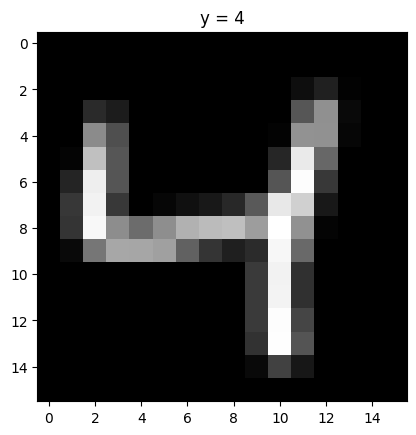

In [ ]:
# Show the third image

show_data(train_dataset[2])

In [ ]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[2][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

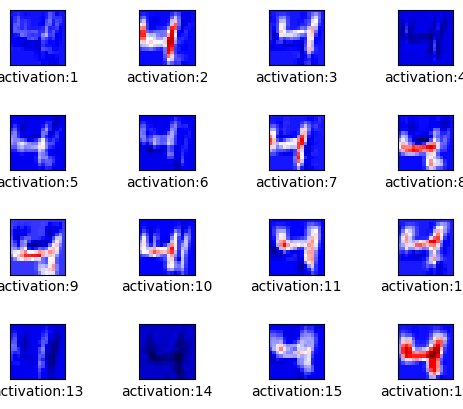

In [ ]:
# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

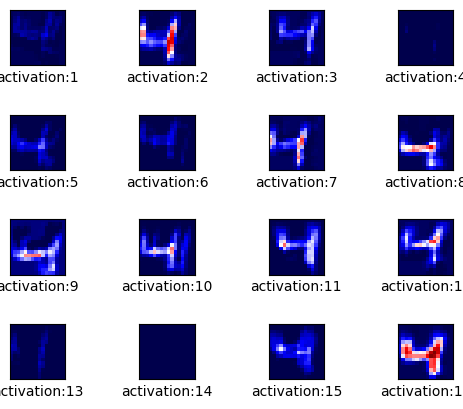

In [ ]:
# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

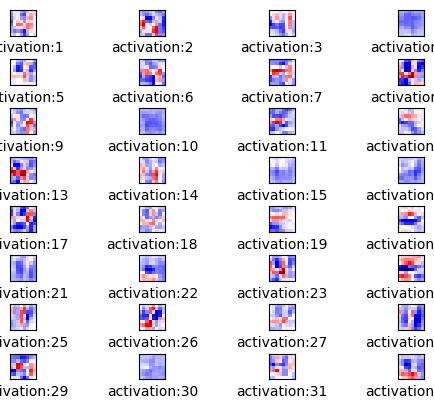

In [ ]:
# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

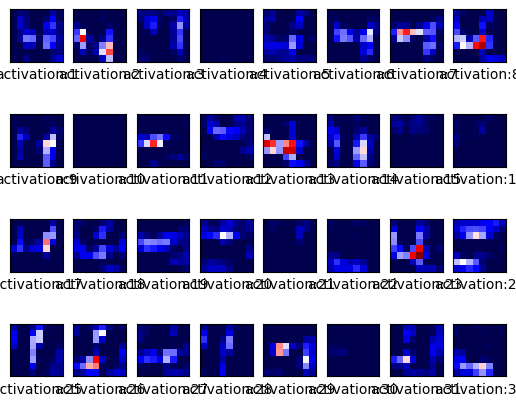

In [ ]:
# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

Plot the first five misclassified samples:


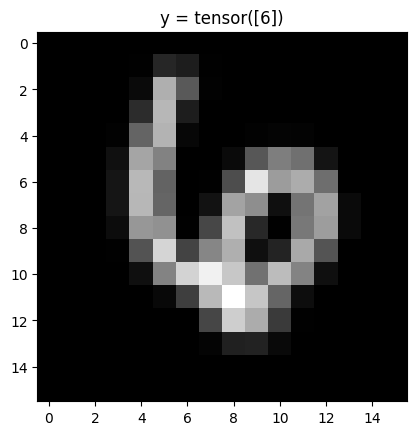

yhat:  tensor([4])


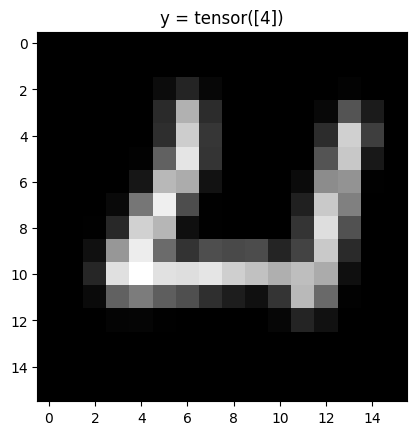

yhat:  tensor([6])


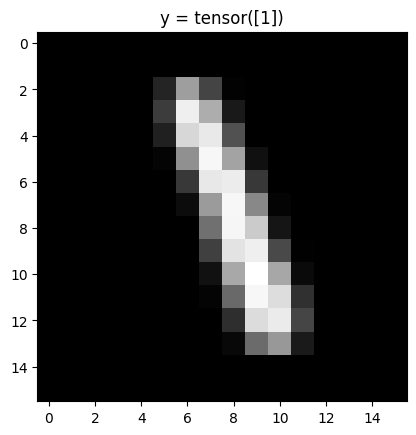

yhat:  tensor([3])


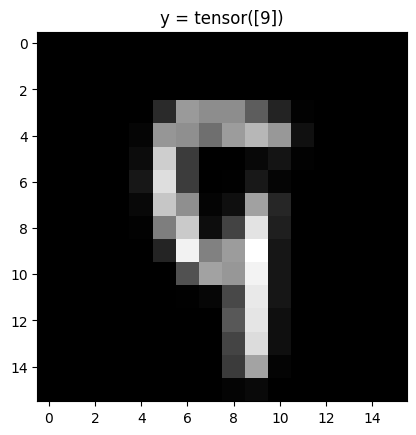

yhat:  tensor([4])


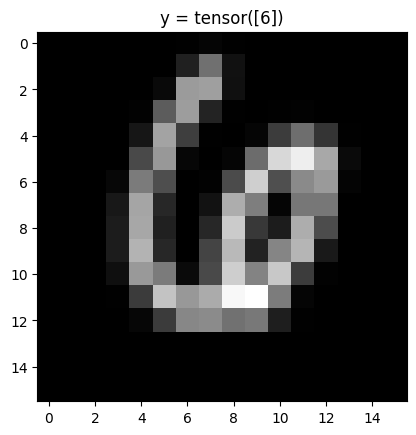

yhat:  tensor([2])


In [ ]:
# Plot the misclassified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break

<!--Empty Space for separating topics-->


# Neural Network for XOR.

In [66]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

Use the following function to calculate accuracy:


In [67]:
# Calculate the accuracy

def accuracy(model, data_set):
    # Rounds prediction to nearest integer 0 or 1
    # Checks if prediction matches the actual values and returns accuracy rate
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2>


Define the neural network module or class:


In [69]:
# Define the class Net with one hidden layer

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # D_in is the input size of the first layer (size of input layer)
        # H is the outpout size of the first layer and the input size of the second layer (size of hidden layer)
        # D_out is the output size of the second layer (size of output layer)
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        # Puts x through first layer then sigmoid function
        x = torch.sigmoid(self.linear1(x))
        # Puts result of previous line through second layer then sigmoid function
        x = torch.sigmoid(self.linear2(x))
        # Output is a number between 0 and 1 due to the sigmoid function. Whichever the output is closer to, 0 or 1, is the class prediction
        return x

Define a function to train the model:


In [70]:
# Function to Train the Model

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    # Lists to keep track of cost and accuracy
    COST = []
    ACC = []
    # Number of times we train on the entire dataset
    for epoch in range(epochs):
        # Total loss over epoch
        total=0
        # For batch in train laoder
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            yhat = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(yhat, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Cumulates loss
            total+=loss.item()
        # Saves cost and accuracy
        ACC.append(accuracy(model, data_set))
        COST.append(total)

    # Prints Cost vs Epoch graph
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)

    # Prints Accuracy vs Epoch graph
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

    return COST

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Dataset class:


In [74]:
# Define the class XOR_Data

class XOR_Data(Dataset):

    # Constructor
    # N_s is the size of the dataset
    def __init__(self, N_s=100):
        # Create a N_s by 2 array for the X values representing the coordinates
        self.x = torch.zeros((N_s, 2))
        # Create a N_s by 1 array for the class the X value belongs to
        self.y = torch.zeros((N_s, 1))
        # Split the dataset into 4 sections
        for i in range(N_s // 4):
            # Create data centered around (0,0) of class 0
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            # Create data centered around (0,1) of class 1
            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])

            # Create data centered around (1,0) of class 1
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])

            # Create data centered around (1,1) of class 0
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            # Add some noise to the X values to make them different
            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

Dataset object:


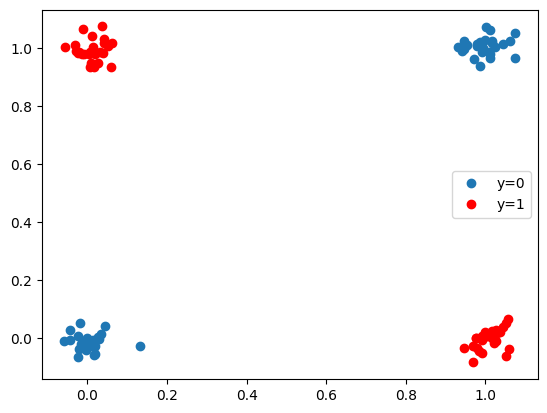

In [75]:
# Create dataset object

data_set = XOR_Data()
data_set.plot_stuff()

<!--Empty Space for separating topics-->


<h2 id="One">One Neuron</h2>


<h3>Try</h3>


Create a neural network <code>model</code> with one neuron in the hidden layer. Then, use the following code to train it:


In [ ]:
# Practice: create a model with one neuron
# Type your code here

Double-click <b>here</b> for the solution.

<!--
model = Net(2, 1, 1)
-->


In [77]:
data_set

In [76]:
model = Net(2, 1, 1)

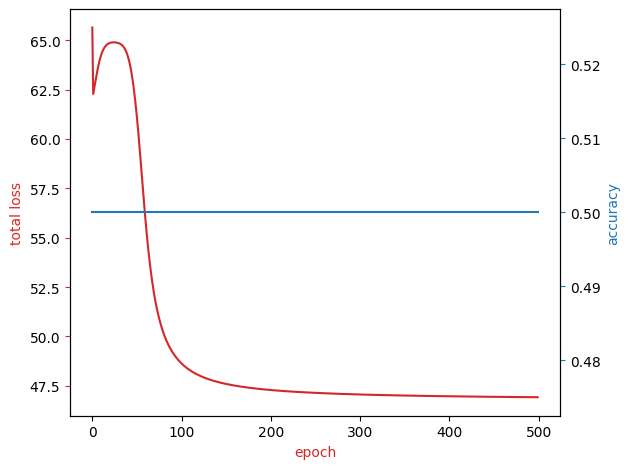

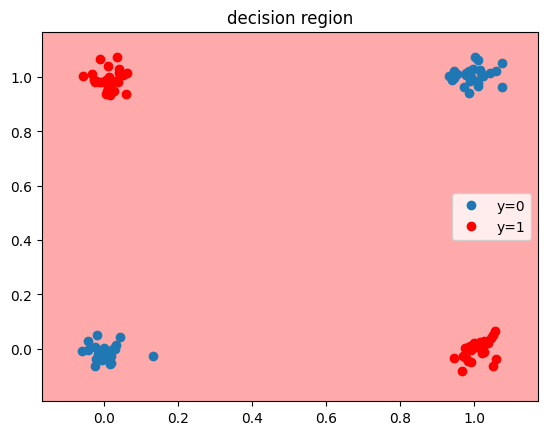

In [78]:
# Train the model

learning_rate = 0.1
# We create a criterion which will measure loss
criterion = nn.BCELoss()
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Create a Data Loader for the training data with a batch size of 1
train_loader = DataLoader(dataset=data_set, batch_size=1)
# Using the training function train the model on 500 epochs
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

<!--Empty Space for separating topics-->


<h2 id="Two">Two Neurons</h2>


<h3>Try</h3>


Create a neural network <code>model</code> with two neurons in the hidden layer. Then, use the following code to train it:


In [ ]:
# Practice: create a model with two neuron
# Type your code here

Double-click <b>here</b> for the solution.

<!--
model = Net(2, 2, 1)
-->


In [79]:
model = Net(2, 2, 1)


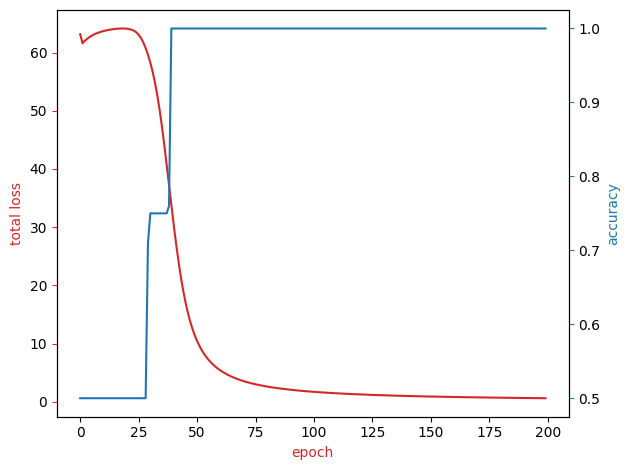

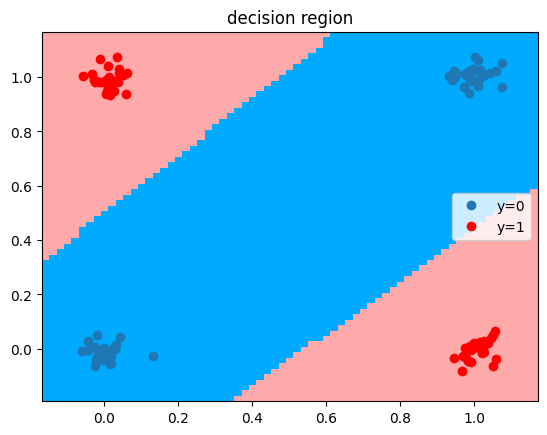

In [80]:
# Train the model

learning_rate = 0.1
# We create a criterion which will measure loss
criterion = nn.BCELoss()
# Create an optimizer with the model parameters and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Create a Data Loader for the training data with a batch size of 1
train_loader = DataLoader(dataset=data_set, batch_size=1)
# Using the training function train the model on 500 epochs
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=200)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

<!--Empty Space for separating topics-->


<h2 id="Three">Three Neurons</h2>


<h3>Try</h3>


Create a neural network <code>model</code> with three neurons in the hidden layer. Then, use the following code to train it:


In [ ]:
# Practice: create a model with two neuron
# Type your code here

Double-click <b>here</b> for the solution.

<!--
model = Net(2, 3, 1)
-->


In [81]:
model = Net(2, 3, 1)


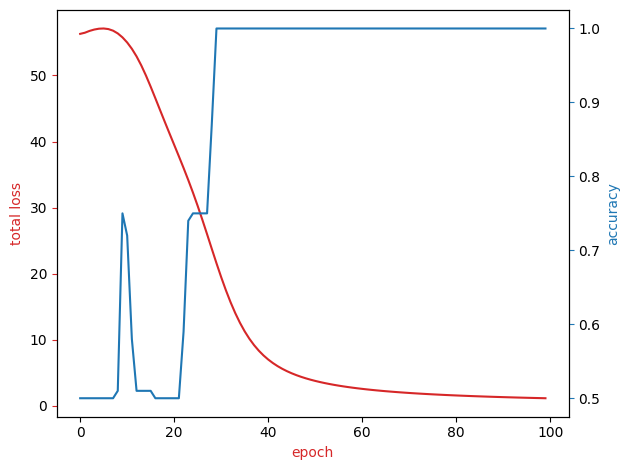

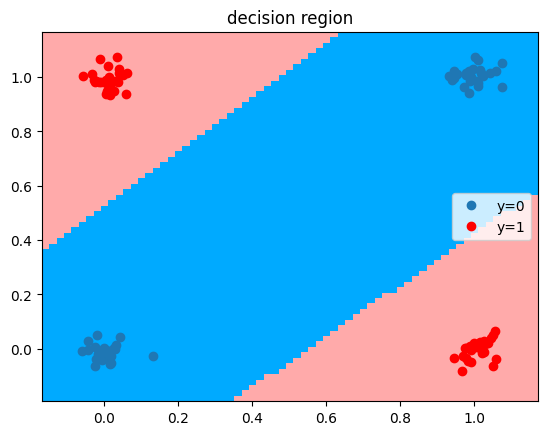

In [82]:
# Train the model

learning_rate = 0.1
# We create a criterion which will measure loss
criterion = nn.BCELoss()
# Create an optimizer with the model parameters and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Create a Data Loader for the training data with a batch size of 1
train_loader = DataLoader(dataset=data_set, batch_size=1)
# Using the training function train the model on 500 epochs
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Plot the data with decision boundaries
plot_decision_regions_2class(model, data_set)

<!--Empty Space for separating topics-->


# Train a NN with Momentum

In [83]:
# Import the libraries for this lab

# Used to graph data and loss curves
import matplotlib.pyplot as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
# Allows us to use activation functions
import torch.nn.functional as F
# Used to graph data and loss curves
from matplotlib.colors import ListedColormap
# Used to help create the dataset and perform mini-batch
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)

Functions used to plot:


In [85]:
# Define a function to plot the decision region

def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
    plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
    plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
    plt.title("decision region")
    plt.legend()

Create the dataset class: We will display the dataset later below


In [86]:
# Create the dataset class

class Data(Dataset):

    # modified from: http://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
          y[ix] = j

        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the diagram
    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
        plt.legend()

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Function for Training</h2>


Create Neural Network Module using <code>ModuleList()</code>


In [87]:
# Create dataset object

class Net(nn.Module):

    # Constructor
    # Given a list of integers, Layers, we create layers of the neural network where each integer in Layers corresponds to the layers number of neurons
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    # Prediction
    # Puts the X value through each layer of the neural network while using the RELU activation function in between. The final output is not put through RELU.
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Create the function for training the model.


In [88]:
# Define the function for training the model

def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    # Lists to keep track of loss and accuracy
    LOSS = []
    ACC = []
    # Number of times we train on the entire dataset
    for epoch in range(epochs):
        # For batch in train laoder
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            yhat = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(yhat, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        # Saves loss and accuracy
        LOSS.append(loss.item())
        ACC.append(accuracy(model,data_set))

    # Prints the Loss and Accuracy vs Epoch graph
    results ={"Loss":LOSS, "Accuracy":ACC}
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis = 'y', color=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()
    return results

Define a function used to calculate accuracy.


In [89]:
# Define a function for calculating accuracy

def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

<!--Empty Space for separating topics-->


<h2 id="Train">Train Different Networks Model different values for the Momentum Parameter</h2>


Create a dataset object using <code>Data</code>


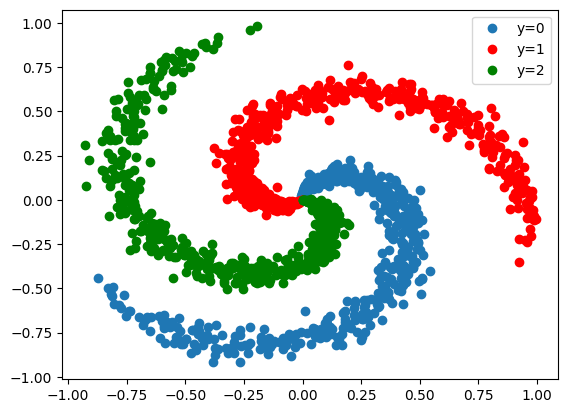

In [90]:
# Create the dataset and plot it

data_set = Data()
data_set.plot_data()
data_set.y = data_set.y.view(-1)

Dictionary to contain different cost and  accuracy values for each epoch  for different values of the momentum parameter.


In [91]:
# Initialize a dictionary to contain the cost and accuracy

Results = {"momentum 0": {"Loss": 0, "Accuracy:": 0}, "momentum 0.1": {"Loss": 0, "Accuracy:": 0}}

Create a  network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of zero.


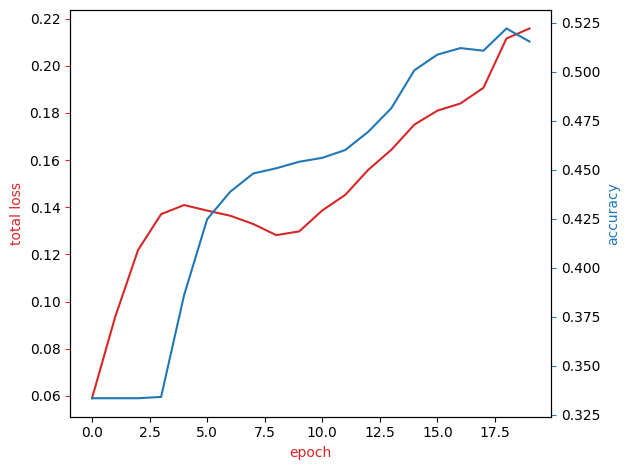

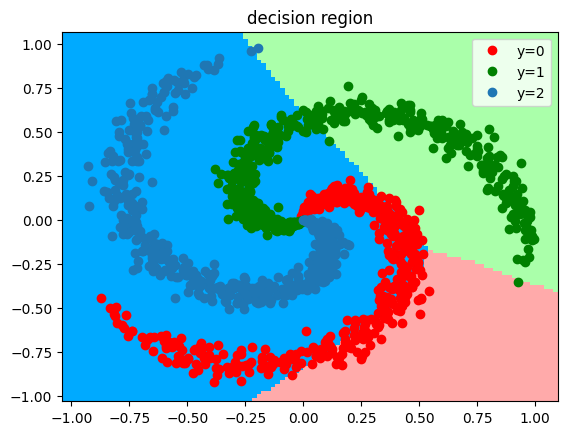

In [97]:
# Train a model with 1 hidden layer and 50 neurons

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and no momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0"] = train(data_set, model, criterion, train_loader, optimizer, epochs=20)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.1.




## Antiguo

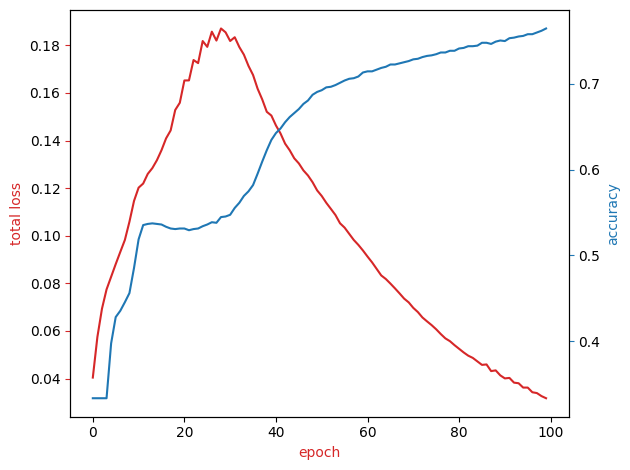

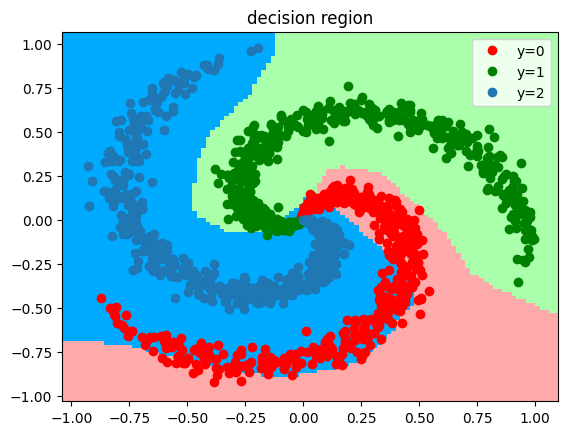

In [93]:
# Train a model with 1 hidden layer and 50 neurons with 0.1 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.1 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.1"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.4.


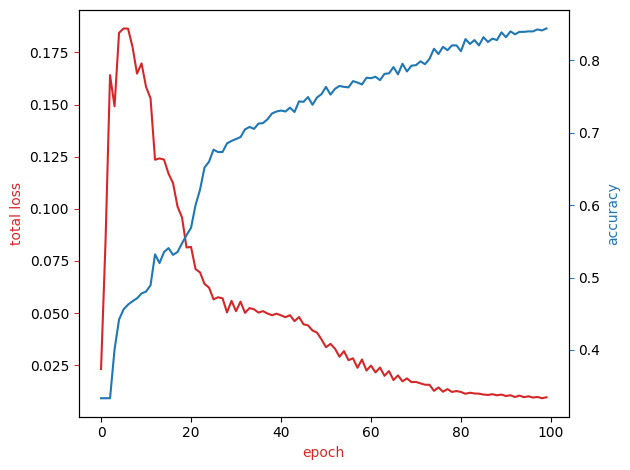

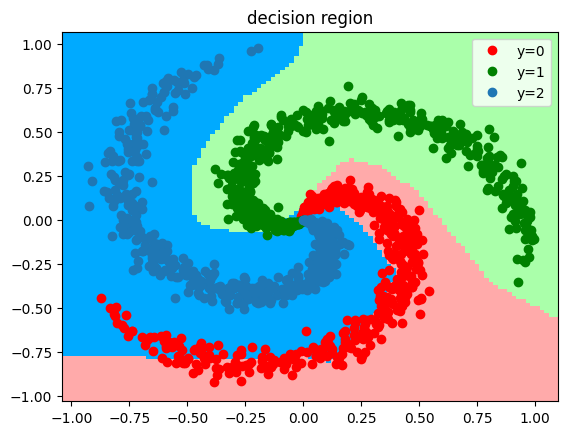

In [94]:
# Train a model with 1 hidden layer and 50 neurons with 0.4 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.4 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.4"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

Create a network to classify three classes with 1 hidden layer with 50 neurons and a momentum value of 0.5.


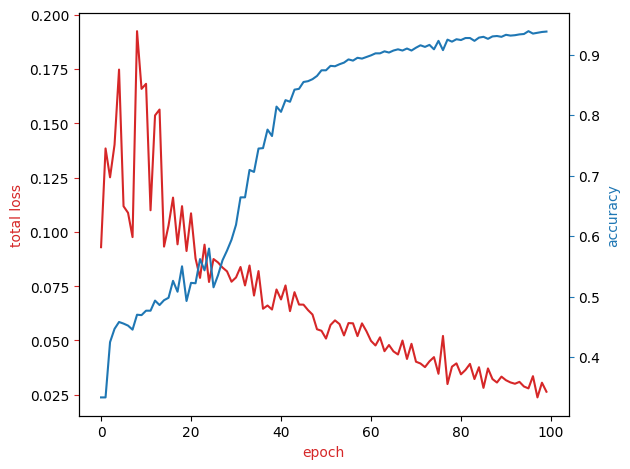

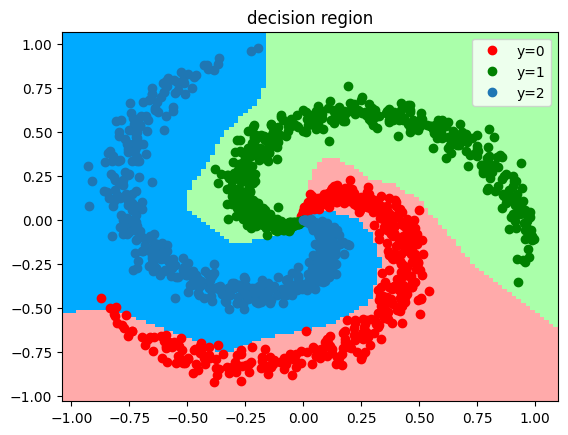

In [95]:
# Train a model with 1 hidden layer and 50 neurons with 0.5 momentum

# Size of input layer is 2, hidden layer is 50, and output layer is 3
# Our X values are x and y coordinates and this problem has 3 classes
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.5 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.5"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

<!--Empty Space for separating topics-->


<h2 id="Result">Compare Results of Different Momentum Terms</h2>


The plot below compares the results of different momentum terms. We see that in general. The Cost decreases proportionally to the momentum term, but larger momentum terms lead to larger oscillations. While the momentum term decreases faster, it seems that a momentum term of 0.2 reaches the smallest value for the cost.


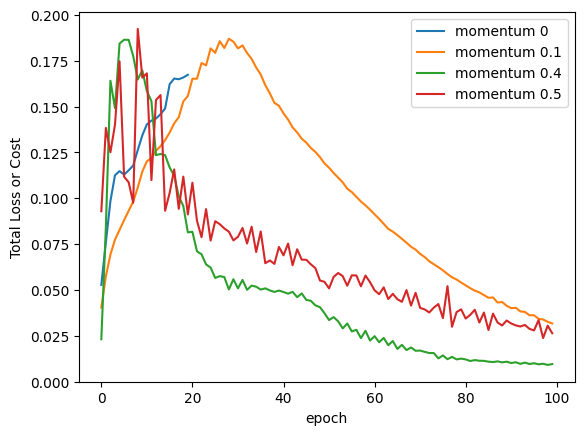

In [96]:
# Plot the Loss result for each term

for key, value in Results.items():
    plt.plot(value['Loss'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Total Loss or Cost')

The  accuracy seems to be proportional to the momentum term.


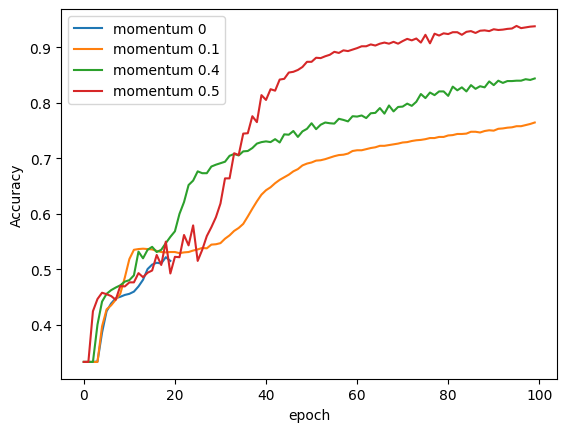

In [98]:
# Plot the Accuracy result for each term

for key, value in Results.items():
    plt.plot(value['Accuracy'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

<!--Empty Space for separating topics-->
